### Imports

In [1]:
%matplotlib inline
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import xarray as xr
from pathlib import Path
from pycurrents.adcp.rdiraw import Multiread
import yaml

import velosearaptor

%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

## Moored ADCP Data Processing with .yaml Parameter File

Read meta data and processing parameters from yaml file. [parameters.yml](parameters.yml).

In [2]:
parameter_file = Path('parameters.yml')

In [3]:
p = velosearaptor.io.parse_yaml_input(parameter_file, "MAVS2", 24606)

In [4]:
a = velosearaptor.madcp.ProcessADCPyml(parameter_file, mooring="MAVS2", sn=24606, verbose=False)

No depth gridding parameters provided, using default values.


time between pings within burst: 3.0 s
time between bursts: 14.0 min
22 pings per burst
365 bursts total


In [5]:
a.burst_average_ensembles()

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 365/365 [00:02<00:00, 138.56it/s]


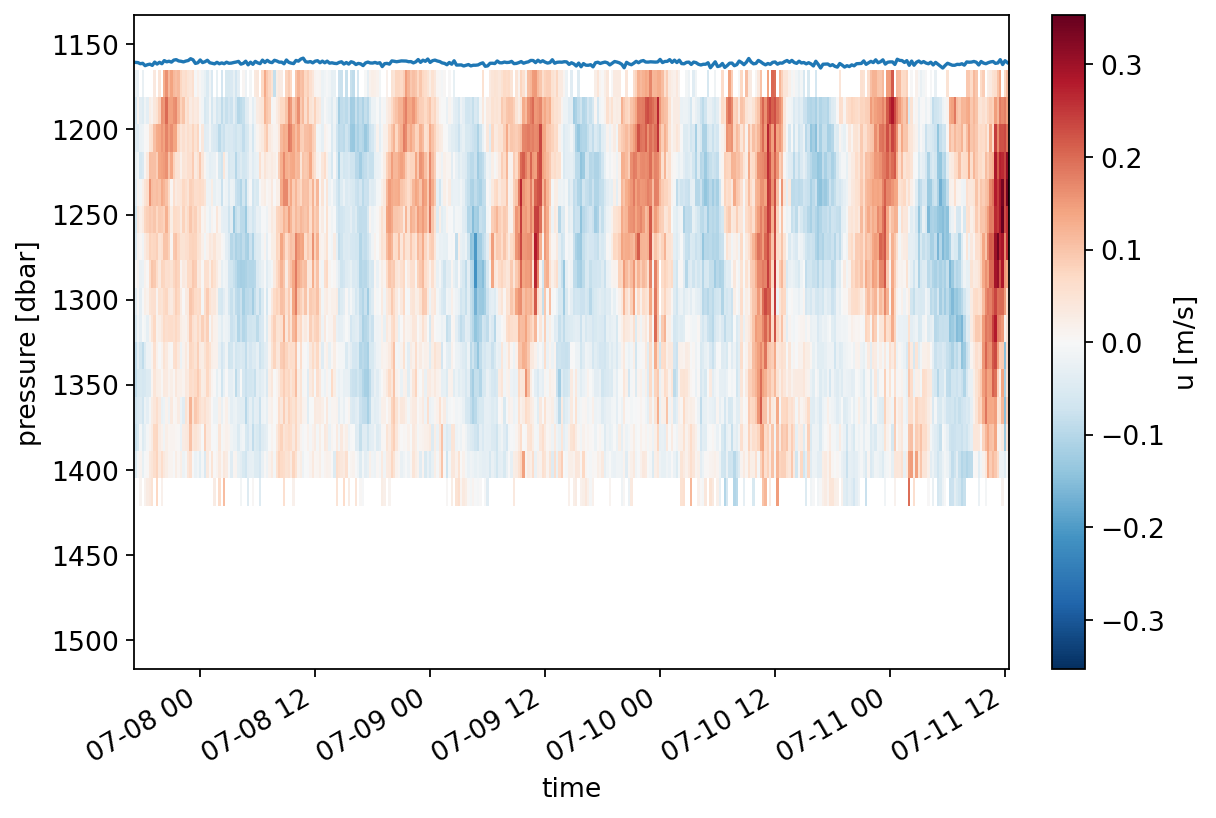

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 5),
                       constrained_layout=True)
a.ds.u.plot(ax=ax)
a.ds.pressure.plot(ax=ax)
ax.invert_yaxis()

In [7]:
a.ds

<xarray.Dataset>
Dimensions:       (z: 24, time: 365)
Coordinates:
  * time          (time) datetime64[ns] 2021-07-07T17:16:03.000325 ... 2021-0...
  * z             (z) float64 1.141e+03 1.157e+03 ... 1.493e+03 1.509e+03
Data variables: (12/16)
    pg            (z, time) int8 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    u             (z, time) float32 nan nan nan nan nan ... nan nan nan nan nan
    v             (z, time) float32 nan nan nan nan nan ... nan nan nan nan nan
    w             (z, time) float32 nan nan nan nan nan ... nan nan nan nan nan
    e             (z, time) float32 nan nan nan nan nan ... nan nan nan nan nan
    u_std         (z, time) float32 nan nan nan nan nan ... nan nan nan nan nan
    ...            ...
    temperature   (time) float32 6.564 6.678 6.668 6.688 ... 5.653 5.614 5.56
    pressure      (time) float32 1.161e+03 1.161e+03 ... 1.16e+03 1.161e+03
    pressure_std  (time) float32 2.457 4.09 4.096 3.15 ... 4.094 3.79 3.724
    pressure_max  (time) float32 1.166e+03 1.171e+03 ... 1.166e+03 1.164e+03
    npings        (time) int16 12 22 22 22 22 22 22 22 ... 22 22 22 22 22 22 2
    xducer_depth  (time) float64 1.147e+03 1.147e+03 ... 1.146e+03 1.147e+03
Attributes: (12/15)
    orientation:      down
    magdec:           -4.974683
    max_e:            0.2
    max_e_deviation:  2
    min_correlation:  64
    project:          BLT
    ...               ...
    sn:               24606
    nominal_depth:    1157m
    Bin1Dist:         25.55
    NCells:           19
    CellSize:         16.0
    proc time:        2022-10-25T20:41:56

In [8]:
a.ds.attrs

{'orientation': 'down',
 'magdec': -4.974683,
 'max_e': 0.2,
 'max_e_deviation': 2,
 'min_correlation': 64,
 'project': 'BLT',
 'mooring': 'MAVS2',
 'lon': -11.843,
 'lat': 54.182,
 'sn': 24606,
 'nominal_depth': '1157m',
 'Bin1Dist': 25.55,
 'NCells': 19,
 'CellSize': 16.0,
 'proc time': '2022-10-25T20:41:56'}